Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import haversine as hs

Loading the data

In [3]:
bike_df = pd.read_csv("201902-fordgobike-tripdata.csv")
bike_df.shape

(183412, 16)

# Assessing Data

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

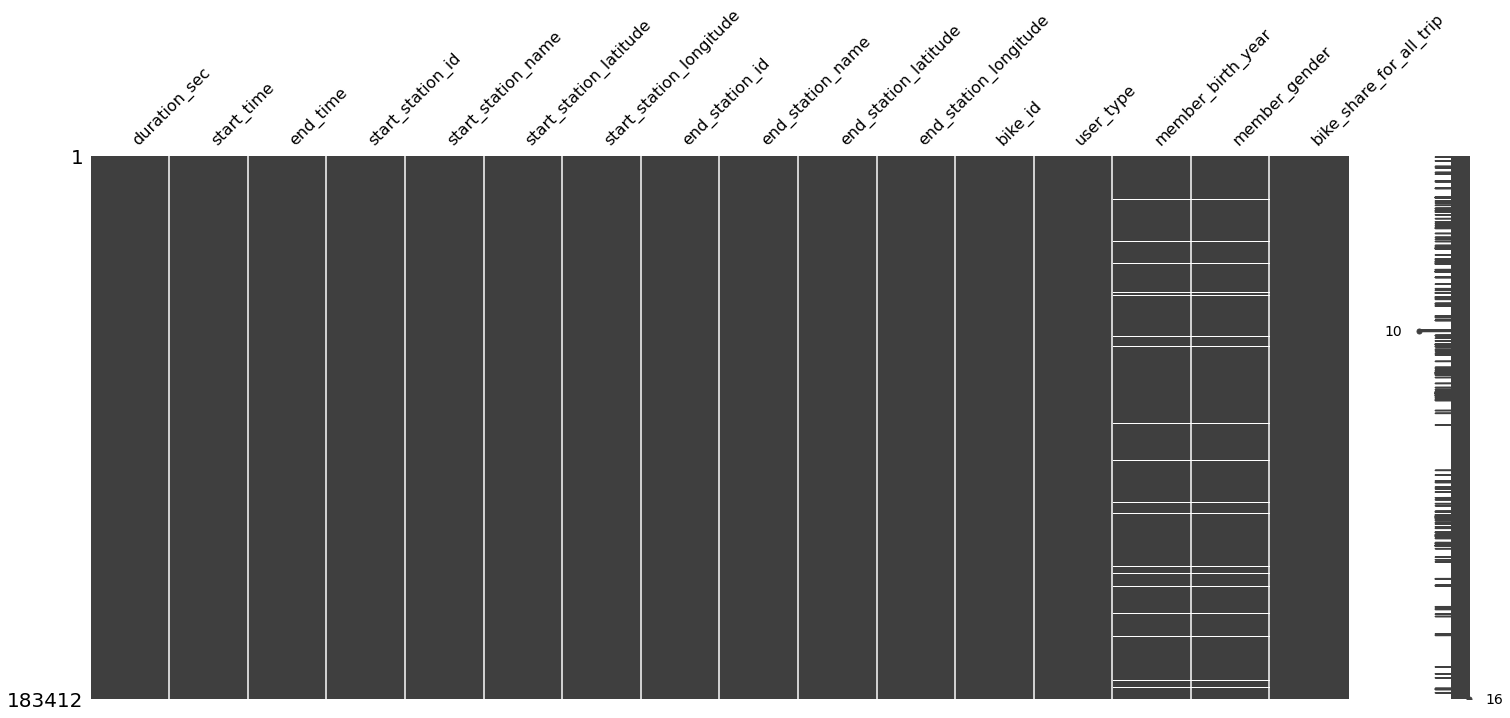

In [5]:
import missingno as msno
msno.matrix(bike_df);

Missing data in columns:


*   start_station_id
*   start_station_name
*   end_station_id
*   end_station_name
*   member_birth_year
*   member_gender





from the matrix, its probably the same people with missing member_birth_year who have missing member_gender.

In [6]:
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [7]:
bike_df['start_station_id'].nunique()

329

In [8]:
bike_df['end_station_id'].nunique()

329

In [9]:
bike_df['start_station_latitude'].nunique()

334

Incorrect datatypes for columns:

*   start_time
*   end_time



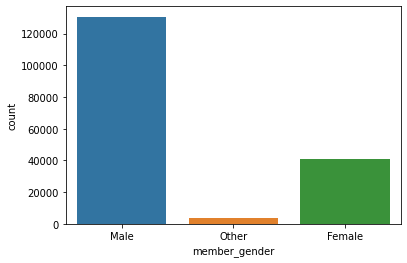

In [10]:
sns.countplot(
    data = bike_df,
    x = 'member_gender'
);

We have more Males in the dataset than the other 2 gender types

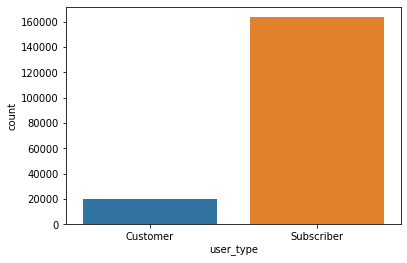

In [11]:
sns.countplot(
    data = bike_df,
    x = 'user_type'
);

There are about 8-times more rides by Subscribers than Customers

In [12]:
bike_df['bike_id'].nunique()

4646

There are 4646 different bicycles in this dataset.


In [13]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [14]:
share_trip_counts = bike_df['bike_share_for_all_trip'].value_counts()

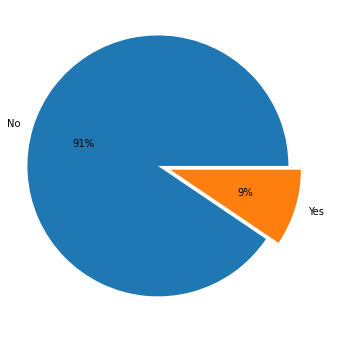

In [15]:
explode = (0.1, 0)
plt.figure(figsize=(6,6))
plt.pie(
    share_trip_counts,
    labels = share_trip_counts.index,
    autopct='%1.0f%%',
    explode=explode
);

Majority of people preferred not to share bikes in this particular period.

What was the relationship between bike_sharing and user_type?

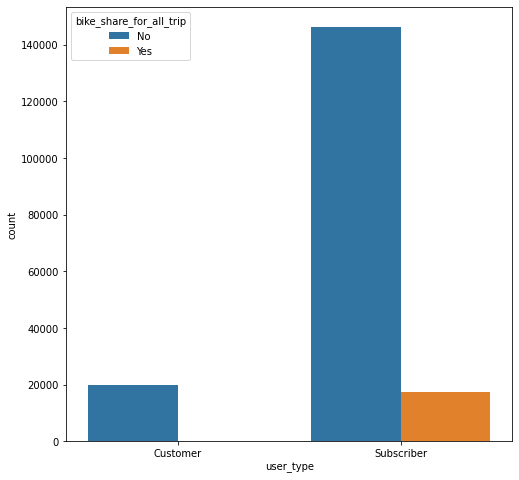

In [16]:
plt.figure(figsize=(8,8))
sns.countplot(
    data = bike_df,
    x = 'user_type',
    hue = 'bike_share_for_all_trip'
);

It seems there was no sharing at all for the Customer user type.

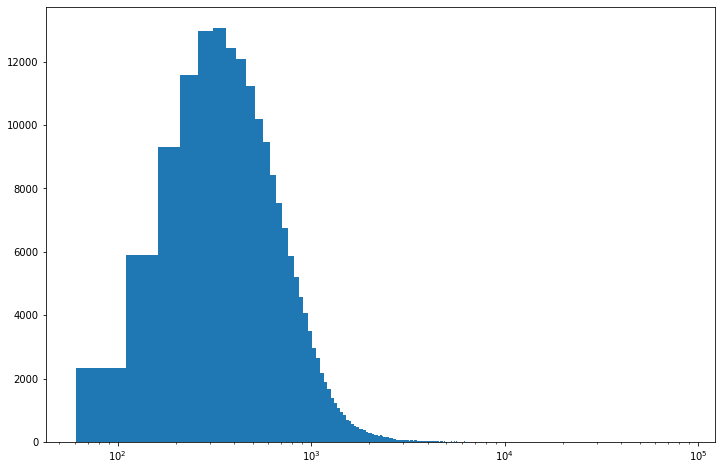

In [17]:
bins = np.arange(bike_df['duration_sec'].min(), bike_df['duration_sec'].max() , 50)
plt.figure(figsize=(12,8))
plt.xscale('log')
plt.hist(
    data = bike_df,
    x = 'duration_sec',
    bins = bins
);

# Cleaning Data

We will make a copy of the dataset first

## Define
correct datatypes for start_time and end_time

In [18]:
bike_clean = bike_df.copy()

## Code

In [19]:
bike_clean['start_time'] = pd.to_datetime(bike_clean['start_time'])
bike_clean['end_time'] = pd.to_datetime(bike_clean['end_time'])

## Test

In [20]:
print(bike_clean['start_time'].dtype)
print(bike_clean['end_time'].dtype)

datetime64[ns]
datetime64[ns]


## Define
Drop missing data for columns:
start_station_id
start_station_name
end_station_id
end_station_name
member_birth_year
member_gender

## Code

In [21]:
bike_clean.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [22]:
bike_clean.shape

(183412, 16)

In [23]:
# Missing data is just 4.5% of the whole dataset, so we will drop it for now
bike_clean.dropna(inplace=True)

## Test

In [24]:
bike_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

## Define
Compute Age from member_birth_year column, and drop the column

In [25]:
#we will use the start_time of the trip, to compute member age at the time they took the trip
bike_clean['start_time'].max().year

2019

In [26]:
bike_clean['member_age'] = bike_clean['start_time'].dt.year - bike_clean['member_birth_year']

In [27]:
#change member_age data type to int, then drop member_birth_year column
bike_clean['member_age'] = bike_clean['member_age'].astype(int)

In [28]:
bike_clean.drop(columns=['member_birth_year'], inplace=True)


## Test

In [29]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

## Define

Change datatypes for end_station_id, start_station_id to int

## Code

In [30]:
bike_clean['start_station_id'] = bike_clean['start_station_id'].astype(int)
bike_clean['end_station_id'] = bike_clean['end_station_id'].astype(int)


## Test

In [31]:
bike_clean['start_station_id'].dtype

dtype('int32')

In [32]:
bike_clean['end_station_id'].dtype

dtype('int32')

## Feature Engineering

### Define
Creating a new feature called start_trip_date from start_trip_time 

### Code

In [33]:
bike_clean['start_trip_date'] = pd.to_datetime(bike_clean['start_time']).dt.date

In [34]:
bike_clean.loc[0, 'start_trip_date']

datetime.date(2019, 2, 28)

### Test

In [35]:
bike_clean['start_trip_date']

0         2019-02-28
2         2019-02-28
3         2019-02-28
4         2019-02-28
5         2019-02-28
             ...    
183407    2019-02-01
183408    2019-02-01
183409    2019-02-01
183410    2019-02-01
183411    2019-02-01
Name: start_trip_date, Length: 174952, dtype: object

In [36]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

## Define
Extract distance between start_station and end_station

## Code

In [37]:
#using haversian distance formula to calculate distance between two geographical points, from their longitude,
#and latitude
distances = []
for ind in bike_clean.index:
	loc1 = (bike_clean['start_station_latitude'][ind], bike_clean['start_station_longitude'][ind])
	loc2 = (bike_clean['end_station_latitude'][ind], bike_clean['end_station_longitude'][ind])
	distance = np.round(hs.haversine(loc1, loc2),2)
	distances.append(distance)


In [38]:
distances[1]

2.7

In [39]:
bike_clean['trip_distance'] = distances

## Test

In [40]:
bike_clean['trip_distance'].describe()

count    174952.000000
mean          1.690052
std           1.097011
min           0.000000
25%           0.910000
50%           1.430000
75%           2.220000
max          69.470000
Name: trip_distance, dtype: float64

# Exploratory Data Analysis
## Univariate Analysis

In [41]:
bike_clean['member_age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

The maximum bike rider age is an outlier, @ 141.

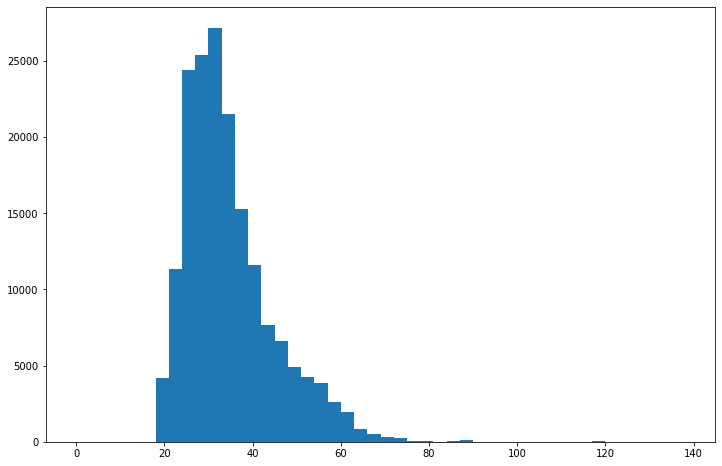

In [42]:
plt.figure(figsize=(12,8))
bins = np.arange(0, bike_clean['member_age'].max(), 3)

plt.hist(
    data = bike_clean,
    x = 'member_age',
    bins = bins
);

The age distribution is unimodal and right-skewed, with the majority of the rider's ages in their 20s and 30s. It makes sense because that is the age range when the normal human being is physically active. However, there are visible outliers, and we will explore those next.

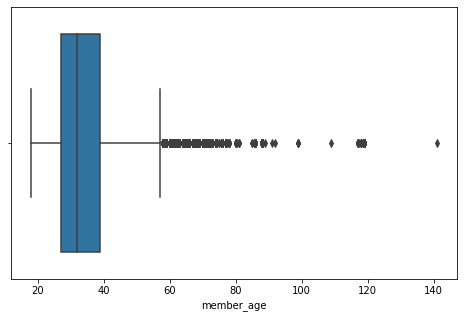

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data = bike_clean,
    x = 'member_age',
);

There is a significant number of outliers in the Age column, with the highest age at 141.?? Lets investigate the gender relations with age, to see if the outliers fall in a certain gender type.

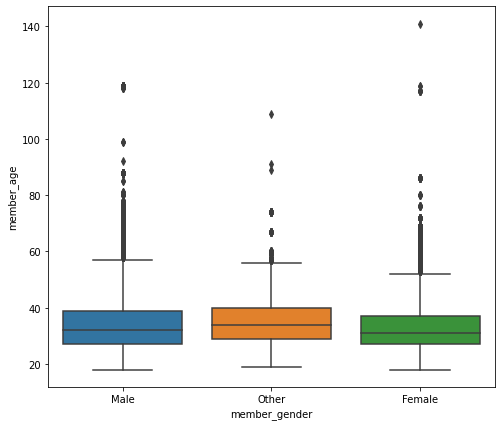

In [44]:
plt.figure(figsize=(8,7))
sns.boxplot(
    data = bike_clean,
    x = 'member_gender',
    y = 'member_age',
    orient = 'v'  
);

The outliers span across the different gender groups.

In [45]:
bike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,start_trip_date,trip_distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,35,2019-02-28,0.54
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,47,2019-02-28,2.70
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,30,2019-02-28,0.26
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,45,2019-02-28,2.41
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,60,2019-02-28,3.33


In [46]:
bike_clean.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,start_trip_date,trip_distance
39199,217,2019-02-23 10:08:26.446,2019-02-23 10:12:04.169,385,Woolsey St at Sacramento St,37.850578,-122.278175,168,Alcatraz Ave at Shattuck Ave,37.849595,-122.265569,5699,Subscriber,Male,No,36,2019-02-23,1.11
110934,350,2019-02-12 17:36:17.185,2019-02-12 17:42:07.912,240,Haste St at Telegraph Ave,37.866043,-122.258804,245,Downtown Berkeley BART,37.870139,-122.268422,4869,Subscriber,Female,No,53,2019-02-12,0.96
43251,205,2019-02-22 16:53:02.588,2019-02-22 16:56:27.928,238,MLK Jr Way at University Ave,37.871719,-122.273068,251,California St at University Ave,37.870555,-122.279720,347,Subscriber,Female,No,48,2019-02-22,0.60
72934,609,2019-02-19 15:16:44.945,2019-02-19 15:26:54.445,90,Townsend St at 7th St,37.771058,-122.402717,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5028,Subscriber,Male,No,41,2019-02-19,1.44
126473,978,2019-02-10 18:36:50.001,2019-02-10 18:53:08.699,309,San Jose City Hall,37.337391,-121.886995,277,Morrison Ave at Julian St,37.333658,-121.908586,3786,Subscriber,Male,Yes,23,2019-02-10,1.95
19705,458,2019-02-26 16:08:53.268,2019-02-26 16:16:31.880,66,3rd St at Townsend St,37.778742,-122.392741,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6113,Subscriber,Male,No,41,2019-02-26,1.86
139987,726,2019-02-07 19:47:50.109,2019-02-07 19:59:56.124,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,71,Broderick St at Oak St,37.773063,-122.439078,4795,Subscriber,Male,No,29,2019-02-07,2.56
18692,404,2019-02-26 18:06:43.064,2019-02-26 18:13:27.693,287,Almaden Blvd at Balbach St,37.326730,-121.889273,312,San Jose Diridon Station,37.329732,-121.901782,737,Subscriber,Male,No,24,2019-02-26,1.16
89818,1903,2019-02-16 14:08:12.010,2019-02-16 14:39:55.340,74,Laguna St at Hayes St,37.776435,-122.426244,6,The Embarcadero at Sansome St,37.804770,-122.403234,4400,Customer,Male,No,32,2019-02-16,3.74
99679,920,2019-02-14 19:13:11.250,2019-02-14 19:28:31.391,115,Jackson Playground,37.765026,-122.398773,8,The Embarcadero at Vallejo St,37.799953,-122.398525,6420,Subscriber,Male,No,30,2019-02-14,3.88


In [47]:
bike_clean.reset_index(drop=True, inplace=True)

In [48]:
bike_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,start_trip_date,trip_distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,35,2019-02-28,0.54
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,47,2019-02-28,2.70
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,30,2019-02-28,0.26
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,45,2019-02-28,2.41
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,60,2019-02-28,3.33


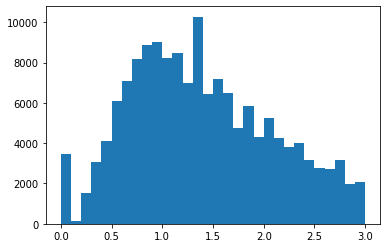

In [49]:
step_d = 0.1 #step distance
bins = np.arange(0, 3 + step_d, step = step_d)
plt.hist(
    data = bike_clean,
     x = 'trip_distance',
     bins = bins
);


It might be that those with total trip distances of zero, ended where their trips started.

In [50]:
df_trip_zero = bike_clean.query('trip_distance == 0')

In [51]:
df_trip_zero[['start_station_name', 'end_station_name']].sample(10)

,start_station_name,end_station_name
52875,San Francisco City Hall (Polk St at Grove St),San Francisco City Hall (Polk St at Grove St)
120192,Powell St BART Station (Market St at 4th St),Powell St BART Station (Market St at 4th St)
126426,Emeryville Town Hall,Emeryville Town Hall
39089,Dolores St at 15th St,Dolores St at 15th St
45524,MLK Jr Way at 14th St,MLK Jr Way at 14th St
59371,8th St at Brannan St,8th St at Brannan St
19485,S Park St at 3rd St,S Park St at 3rd St
130025,College Ave at Alcatraz Ave,College Ave at Alcatraz Ave
166626,Franklin St at 9th St,Franklin St at 9th St
84410,5th St at Taylor St,5th St at Taylor St


For sure those with 0 kms distance travelled, had their trips end where they started.

I am still interested to know how the distribution of distances travelled by the outliers in age look like. So I will create a dataset and investigate.

In [52]:
bike_clean['member_age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

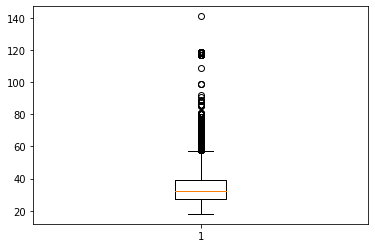

In [53]:
#creating a boxplot dictionary to extract statistics so we can see the max age before outliers
bp = plt.boxplot(
    data = bike_clean,
    x = 'member_age'
)

In [54]:
bp.keys()

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

In [55]:
for key in bp:
    print(f'{key}: {[item.get_ydata() for item in bp[key]]}\n') 

whiskers: [array([27., 18.]), array([39., 57.])]

caps: [array([18, 18]), array([57, 57])]

boxes: [array([27., 27., 39., 39., 27.])]

medians: [array([32., 32.])]

fliers: [array([60, 60, 60, ..., 69, 74, 92])]

means: []



In [56]:
df_age_outliers = bike_clean.query('member_age > 57')
df_age_outliers.shape

(5781, 18)

We have 5781 trips by members above the age of 57 in one month. Quite impressive. Lets see the age distribution.

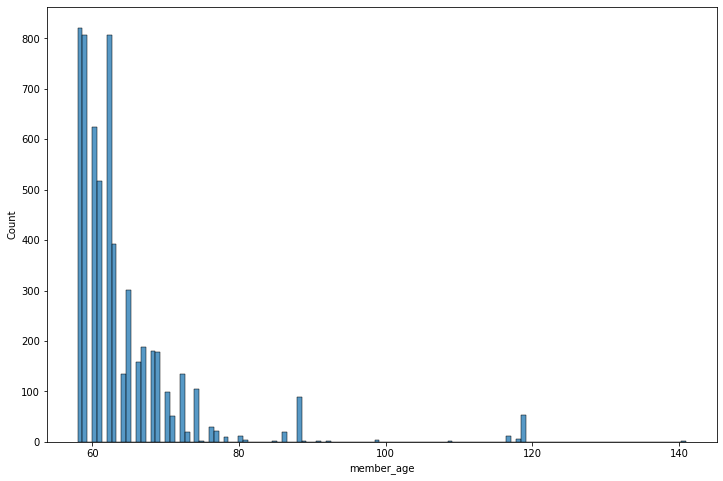

In [57]:
plt.figure(figsize=(12,8))
sns.histplot(
    data = df_age_outliers,
    x = 'member_age'
);

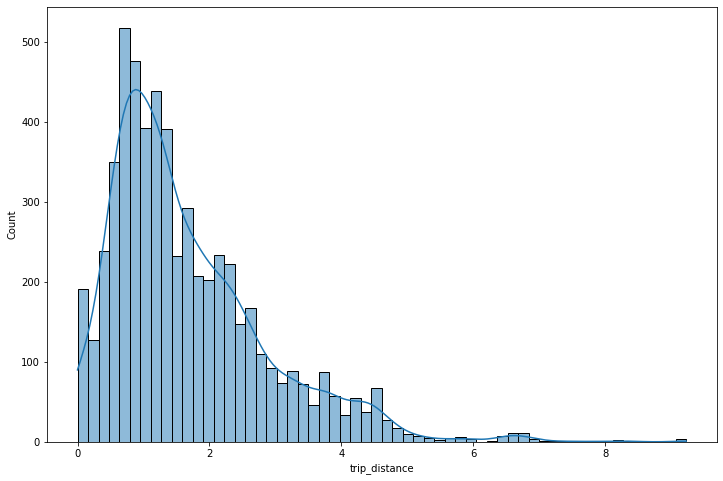

In [58]:
plt.figure(figsize=(12,8))
sns.histplot(
    data = df_age_outliers,
    x = 'trip_distance',
    kde=True
);

The majority are riding for less than 2 kilometres, as we can see that the distribution is right skewed.

## Bivariate Analysis

Starting with a pairgrid just to see correlations between various numeric features

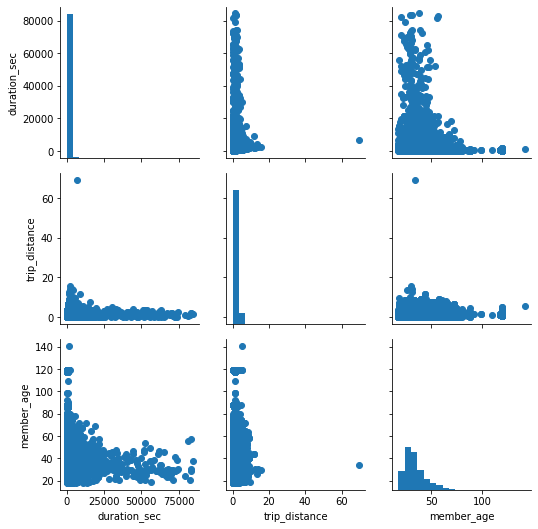

In [59]:
numeric_vars = ['duration_sec', 'trip_distance', 'member_age']
g = sns.PairGrid(data = bike_clean, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

There is an interesting relationship between member_age and duration_sec. Lets look further into that.

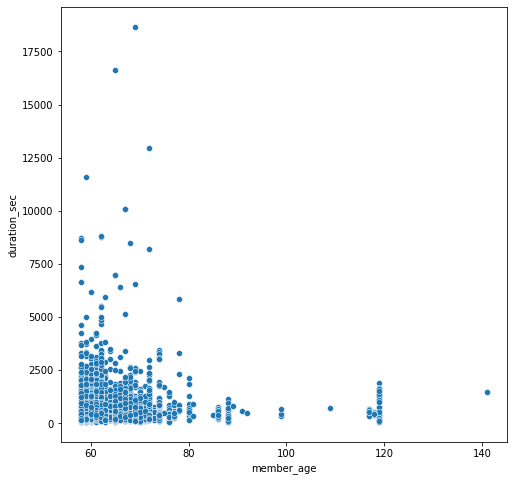

In [60]:
plt.figure(figsize=(8,8))
sns.scatterplot(
    data = df_age_outliers,
    x = 'member_age',
    y = 'duration_sec'
);

There is a week negative correlation, meaning generally members of the older age tend to embark on shorter duration trips, than their counterparts. Let's see the correlation numbers.

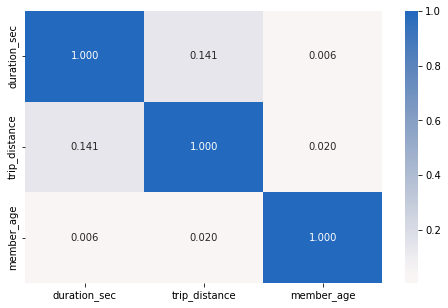

In [61]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(bike_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show();

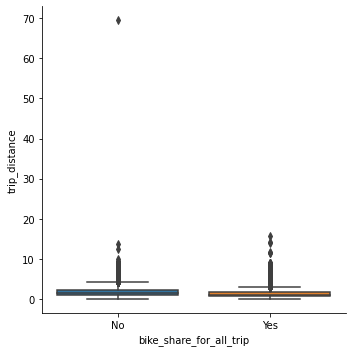

In [62]:
sns.catplot(
    data = bike_clean,
    x = 'bike_share_for_all_trip',
    y = 'trip_distance',
    kind = 'box'
);

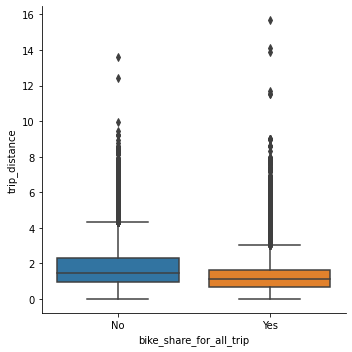

In [63]:
#cutting out the 70 kms trip distance
sns.catplot(
    data = bike_clean.query('trip_distance < 50'),
    x = 'bike_share_for_all_trip',
    y = 'trip_distance',
    kind = 'box'
);


They are outliers as well in the distance covered on trips. The median distance covered for those sharing bikes, and those who aren't is below 2 kms.

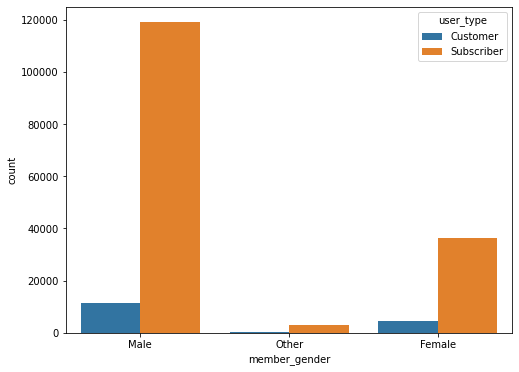

In [64]:
plt.figure(figsize=(8,6))
sns.countplot(
    data = bike_clean,
    x = 'member_gender',
    hue = 'user_type'
);

## Interesting features to be used in analysis:

### Qualitative features:


*   user_type
*   member_gender
*   bike_share_for_all_trip

### Quantitative features:
*   member_age
*   duration_sec

### Geographic features
*   start_station_longitude
*   start_station_latitude
*   end_station_longitude
*   end_station_latitude

### Time Series
*   start_time
*   trip_start_date
*   end_time




# Explanatory Data Analysis

## Question 1:

Is there a relationship between gender and duration of rides?

## Visualization

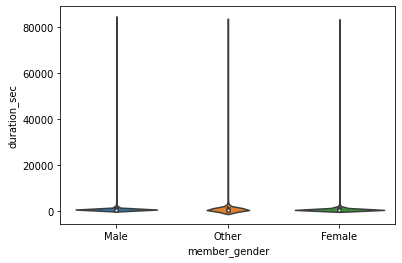

In [65]:
sns.violinplot(
    data = bike_clean,
    x = 'member_gender',
    y = 'duration_sec'
);

There are certainly some heavy riders compared to the rest of the crowd.
Lets exclude these outliers.

In [66]:
bike_clean['duration_sec'].describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

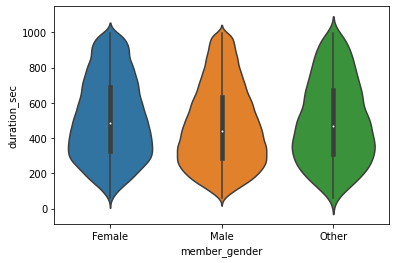

In [67]:
sns.violinplot(
    data = bike_clean[bike_clean['duration_sec'] < 1000],
    x = 'member_gender',
    y = 'duration_sec'
);

There is not really much of a difference in the distributions above, although the average riding time for males seems to be the least in the gender group.

In [68]:
#lets subset for riders with less than 1000 seconds in time duration
df_1000_less = bike_clean.query('duration_sec < 1000')

In [69]:
#group by gender
grouped_gender_duration = df_1000_less.groupby('member_gender')['duration_sec'].mean()
grouped_gender_duration.sort_values(ascending=False)

member_gender
Female    512.656786
Other     494.259259
Male      470.862369
Name: duration_sec, dtype: float64

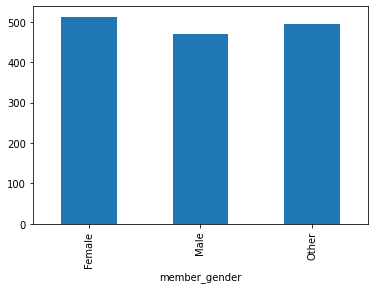

In [70]:
grouped_gender_duration.plot(kind='bar');

## Observation
Females tend to take more time on average during their rides than the Male and Other gender types. Males take the least time.

## Question 2
Do bike ride times decrease with age?

## Visualization

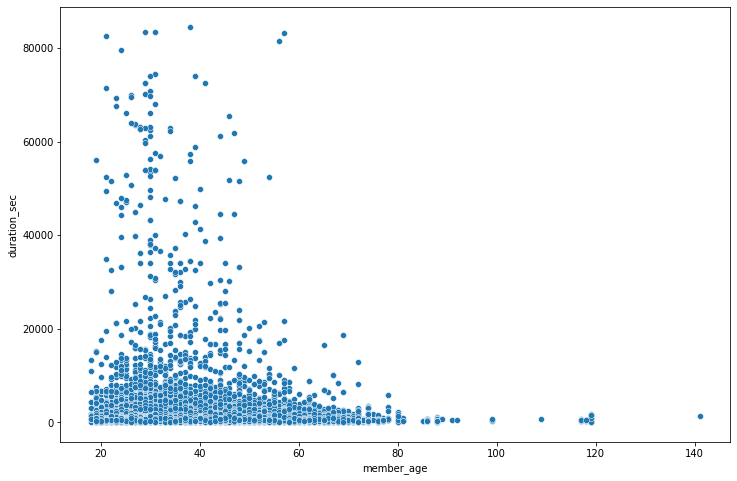

In [71]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    data = bike_clean,
    x = 'member_age',
    y = 'duration_sec'
);

The majority of the data is for age < 80 and duration less than 20k. Lets investigate that.

In [72]:
cut_df = bike_clean.loc[(bike_clean['member_age'] <= 80) & (bike_clean['duration_sec'] <= 20000)]

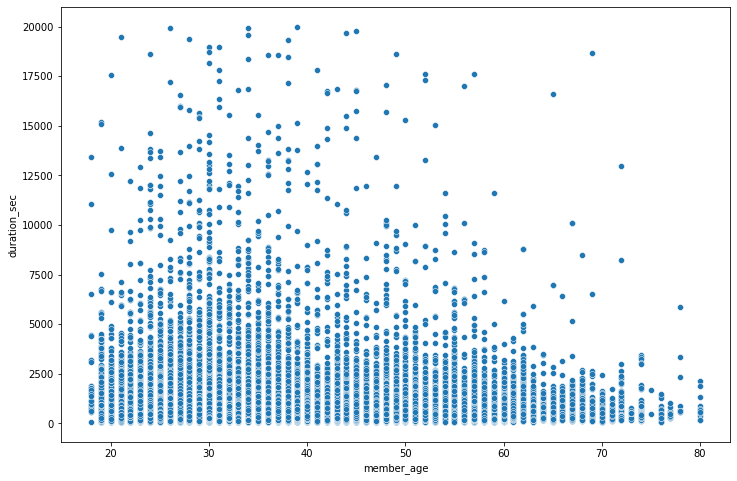

In [73]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    data = cut_df,
    x = 'member_age',
    y = 'duration_sec'
);

In [74]:
#lets get a subset of about 500 points of the cut_df
df_subset = cut_df.sample(500)


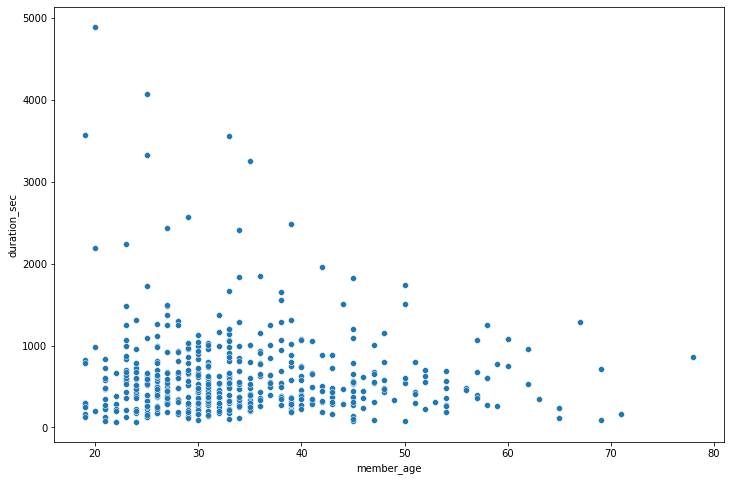

In [75]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    data = df_subset,
    x = 'member_age',
    y = 'duration_sec'
);

## Observation

The correlation between Age and Duration of rides seems to be very weak.

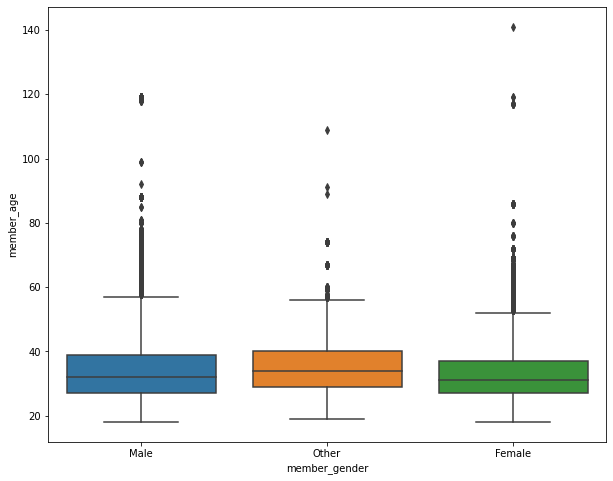

In [76]:
plt.figure(figsize=(10, 8))
sns.boxplot(
    data = bike_clean,
    x = 'member_gender',
    y = 'member_age'
);

Time Series Analysis

In [77]:
#introducing number_of_bikes column for easy aggregation
bike_clean['number_of_bikes'] = 1

In [78]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [79]:
day_1 = bike_clean['start_trip_date'][0]
day_1.year, day_1.month, day_1.day

(2019, 2, 28)

In [80]:
bike_clean['start_trip_date'][0]

datetime.date(2019, 2, 28)

In [81]:
bike_clean['start_trip_date'].min()

datetime.date(2019, 2, 1)

In [82]:
bike_clean['start_trip_date'].max()

datetime.date(2019, 2, 28)

In [83]:
bike_clean['start_time'].duplicated().sum()

11

In [84]:
time_df = bike_clean.groupby([pd.Grouper(key='start_time', freq='D')]).agg(unique_bikes=('bike_id', 'nunique'),
         total_bikes = ('number_of_bikes','sum'),
         total_trip_time = ('duration_sec','sum'),
         total_trip_distance = ('trip_distance', 'sum'))

In [85]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2019-02-01 to 2019-02-28
Freq: D
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_bikes         28 non-null     int64  
 1   total_bikes          28 non-null     int64  
 2   total_trip_time      28 non-null     int64  
 3   total_trip_distance  28 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.1 KB


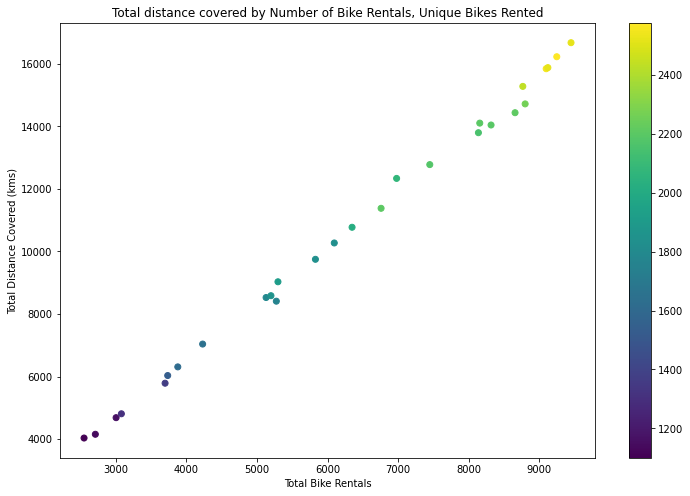

In [86]:
plt.figure(figsize=(12,8))
plt.scatter(
    data = time_df,
    x = 'total_bikes',
    y = 'total_trip_distance',
    c = 'unique_bikes'
);
plt.title('Total distance covered by Number of Bike Rentals, Unique Bikes Rented')
plt.xlabel('Total Bike Rentals')
plt.ylabel('Total Distance Covered (kms)')
plt.colorbar();

As expected, the correlation between the 3 features is very positive  .Lets confirm this with the actual correlation numbers.

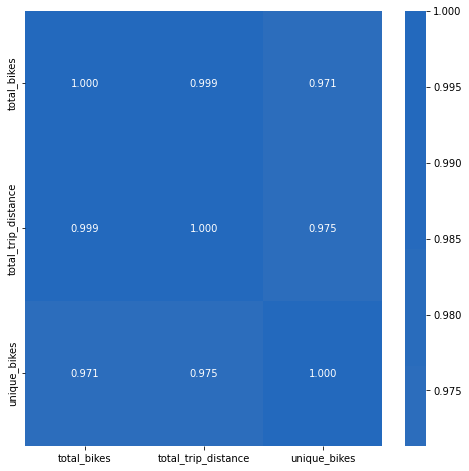

In [87]:
# correlation plot
n_vars = ['total_bikes', 'total_trip_distance', 'unique_bikes']
plt.figure(figsize = [8, 8])
sns.heatmap(time_df[n_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

The correlation heatmap stamps the observation that as bike rentals increase, the number of unique bikes rented also increases and so does the covered trip distance.

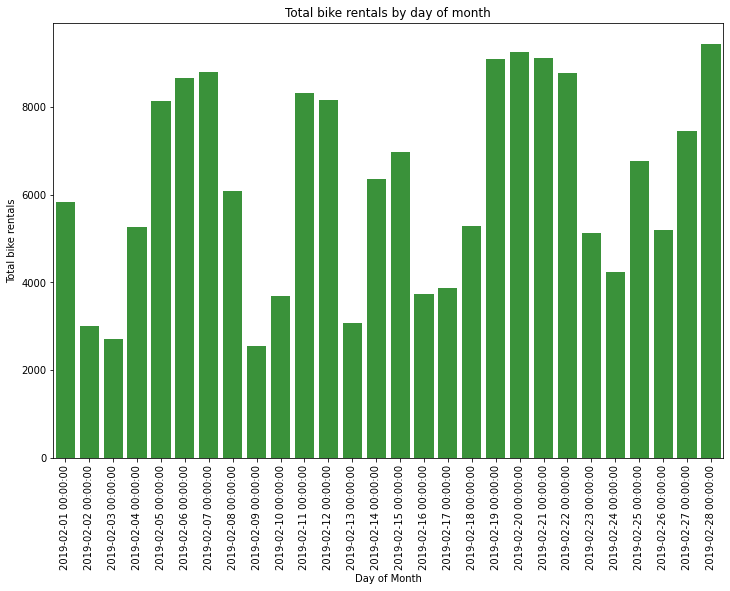

In [88]:
plt.figure(figsize=(12,8))
g_color = sns.color_palette()[2]
sns.barplot(
    data = time_df,
    x = time_df.index,
    y = 'total_bikes',
    color = g_color,
);
plt.title("Total bike rentals by day of month")
plt.ylabel("Total bike rentals")
plt.xlabel("Day of Month")
plt.xticks(rotation=90);

In [89]:
bike_clean.groupby([pd.Grouper(key='start_time', freq='W'), 'user_type']).number_of_bikes.sum()

start_time  user_type 
2019-02-03  Customer       1158
            Subscriber    10381
2019-02-10  Customer       3506
            Subscriber    39696
2019-02-17  Customer       3927
            Subscriber    36555
2019-02-24  Customer       5791
            Subscriber    45089
2019-03-03  Customer       2184
            Subscriber    26665
Name: number_of_bikes, dtype: int64

In [90]:
# grouping data and named aggregation on bike_id, number_of_bikes, and duration_sec
weekly_df = bike_clean.groupby([pd.Grouper(key='start_time', freq='W'), 'user_type']).agg(unique_bikes=('bike_id', 'nunique'),
         total_bikes=('number_of_bikes','sum'),
         total_trip_time=('duration_sec','sum'))

In [91]:
weekly_df.head()

unique_bikes  total_bikes  total_trip_time
start_time user_type                                             
2019-02-03 Customer             791         1158          1418293
           Subscriber          2234        10381          6593668
2019-02-10 Customer            1678         3506          4963089
           Subscriber          3070        39696         24606266
2019-02-17 Customer            1944         3927          5105009

In [92]:
weekly_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 10 entries, (Timestamp('2019-02-03 00:00:00', freq='W-SUN'), 'Customer') to (Timestamp('2019-03-03 00:00:00', freq='W-SUN'), 'Subscriber')
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   unique_bikes     10 non-null     int64
 1   total_bikes      10 non-null     int64
 2   total_trip_time  10 non-null     int64
dtypes: int64(3)
memory usage: 433.0+ bytes


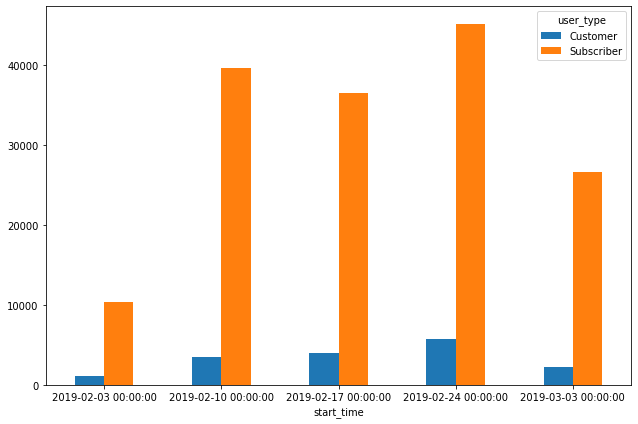

In [93]:
ax = weekly_df.unstack(level=1).plot(y = 'total_bikes', kind='bar', rot=0, figsize=(9, 6))
plt.tight_layout()

The last week of the month saw the most bike rentals, between both Subscribers and Customers, while the first week of February saw the least traffic.

In [94]:
s = pd.date_range(bike_clean['start_time'].min(), bike_clean['start_time'].max(), freq='D').to_series()
weekdays_ser = s.dt.dayofweek

In [95]:
weekday_dict = {
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thursday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday'
}

In [96]:
weekday_dict.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6])

In [97]:
weekdays_list = []
for entry in weekdays_ser:
    if entry in weekday_dict.keys():
        weekdays_list.append(weekday_dict[entry])


In [98]:
len(weekdays_list)

28

In [99]:
time_df['weekday'] = weekdays_list

In [100]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2019-02-01 to 2019-02-28
Freq: D
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_bikes         28 non-null     int64  
 1   total_bikes          28 non-null     int64  
 2   total_trip_time      28 non-null     int64  
 3   total_trip_distance  28 non-null     float64
 4   weekday              28 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 2.4+ KB


In [101]:
week_day_df = time_df.groupby('weekday').agg(
    total_rentals = ('total_bikes', 'sum')
    )

In [102]:
week_day_df.reset_index(inplace=True)
week_day_df

,weekday,total_rentals
0,Friday,27663
1,Monday,25641
2,Saturday,14414
3,Sunday,14512
4,Thursday,33712
5,Tuesday,30584
6,Wednesday,28426


In [103]:
#converting weekdays into an ordered categorical dtype
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

w_classes = pd.api.types.CategoricalDtype(ordered=True, categories=weekday_order)

week_day_df['weekday'] = week_day_df['weekday'].astype(w_classes)

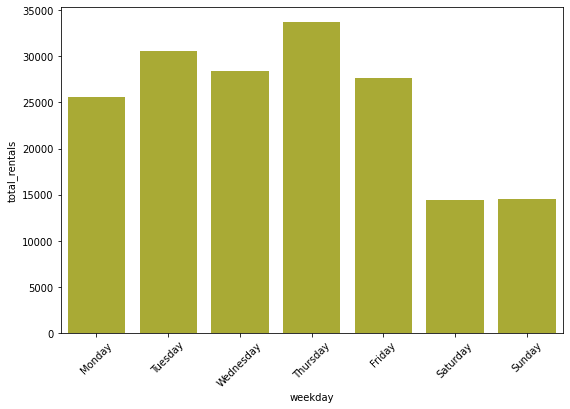

In [104]:
color = sns.color_palette()[8]
plt.figure(figsize=(9,6))
sns.barplot(
    data = week_day_df,
    x = 'weekday',
    y = 'total_rentals',
    color = color
);
plt.xticks(rotation = 45);

Most trips occur on Thursdays, followed by Tuesdays, whilst the least trips are taken on weekends (Saturdays and Sundays)